In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from sklearn.cluster import KMeans
import time
import shutil
import pathlib
import itertools
from PIL import Image


import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report


from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

import warnings
from tensorflow.keras.applications import InceptionV3

from imblearn.over_sampling import RandomOverSampler

from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Sequential

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, GaussianNoise, Input, MultiHeadAttention, Reshape

In [2]:
import os
for dirname, _, filenames in os.walk('Diverse Fetal Head Images-orginal-image'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Diverse Fetal Head Images-orginal-image\000_HC.png
Diverse Fetal Head Images-orginal-image\001_HC.png
Diverse Fetal Head Images-orginal-image\002_HC.png
Diverse Fetal Head Images-orginal-image\003_HC.png
Diverse Fetal Head Images-orginal-image\004_HC.png
Diverse Fetal Head Images-orginal-image\005_HC.png
Diverse Fetal Head Images-orginal-image\006_HC.png
Diverse Fetal Head Images-orginal-image\007_HC.png
Diverse Fetal Head Images-orginal-image\008_HC.png
Diverse Fetal Head Images-orginal-image\009_HC.png
Diverse Fetal Head Images-orginal-image\010_2HC.png
Diverse Fetal Head Images-orginal-image\010_HC.png
Diverse Fetal Head Images-orginal-image\011_HC.png
Diverse Fetal Head Images-orginal-image\012_HC.png
Diverse Fetal Head Images-orginal-image\013_HC.png
Diverse Fetal Head Images-orginal-image\014_2HC.png
Diverse Fetal Head Images-orginal-image\014_3HC.png
Diverse Fetal Head Images-orginal-image\014_HC.png
Diverse Fetal Head Images-orginal-image\015_HC.png
Diverse Fetal Head Images-or

In [3]:
image_folder = 'Diverse Fetal Head Images-orginal-image'

In [4]:
image_files = os.listdir(image_folder)

In [5]:
image_count = len(image_files)
print(f'Total number of images: {image_count}')

Total number of images: 999


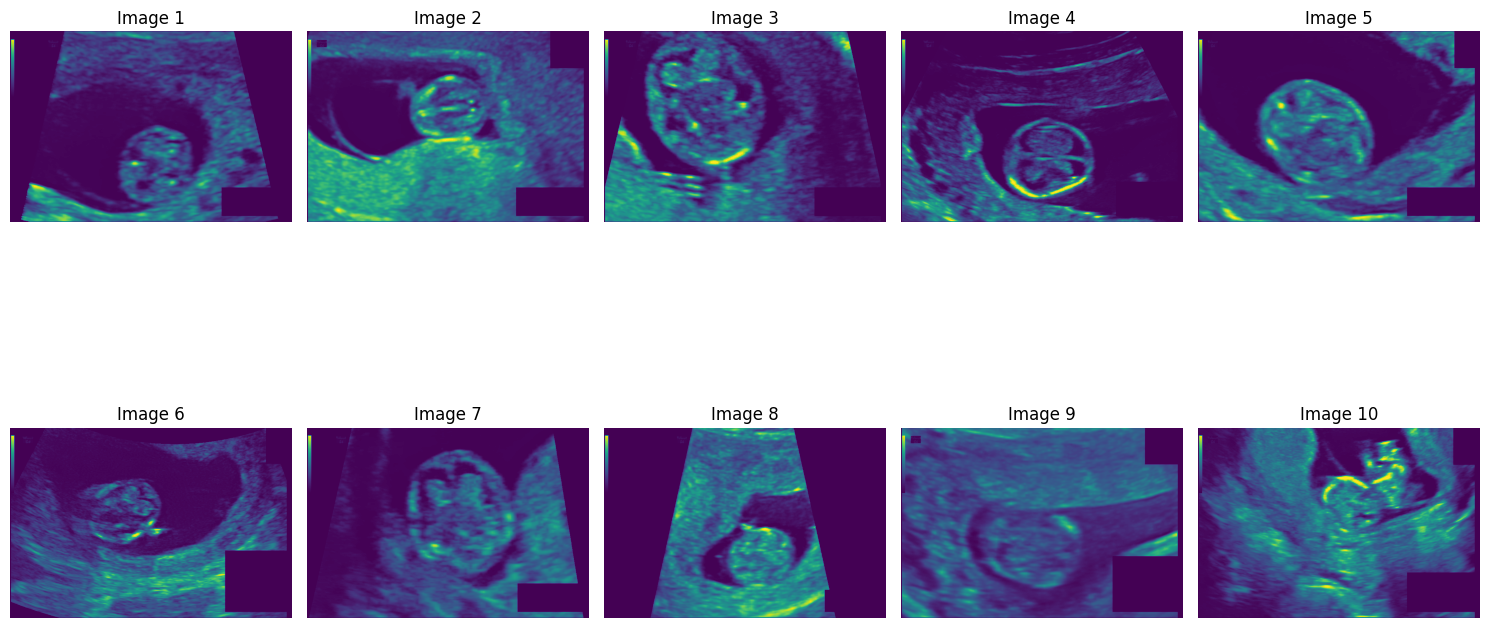

In [6]:
plt.figure(figsize=(15, 10))

for i in range(10):
    img_path = os.path.join(image_folder, image_files[i])
    img = Image.open(img_path)

    plt.subplot(2, 5, i + 1)  
    plt.imshow(img)
    plt.axis('off') 
    plt.title(f'Image {i + 1}')

plt.tight_layout()
plt.show()

In [7]:
images = []

for file in image_files:
    img_path = os.path.join(image_folder, file)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
    img = cv2.resize(img, (256, 256))  
    images.append(img)

images_array = np.array(images)

In [8]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [9]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

features = base_model.predict(preprocess_input(images_array))
features_reshaped = features.reshape(features.shape[0], -1) 

32/32 ━━━━━━━━━━━━━━━━━━━━ 129s 4s/step


In [10]:
n_clusters = 3

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(features_reshaped)

labels = kmeans.labels_

C:\Users\HP\anaconda3\envs\abhijitg_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [11]:
df = pd.DataFrame({'image_path': image_files,'cluster_label': labels})

In [12]:
df.head()

,image_path,cluster_label
0,000_HC.png,2
1,001_HC.png,2
2,002_HC.png,2
3,003_HC.png,2
4,004_HC.png,2


In [13]:
df.tail()

,image_path,cluster_label
994,801_HC.png,1
995,802_HC.png,2
996,803_HC.png,1
997,804_HC.png,1
998,805_HC.png,1


In [14]:
df.shape

(999, 2)

In [15]:
df.columns

Index(['image_path', 'cluster_label'], dtype='object')

In [16]:
df['cluster_label'].unique()

array([2, 1, 0])

In [17]:
df['cluster_label'].value_counts()

cluster_label
1    431
0    329
2    239
Name: count, dtype: int64

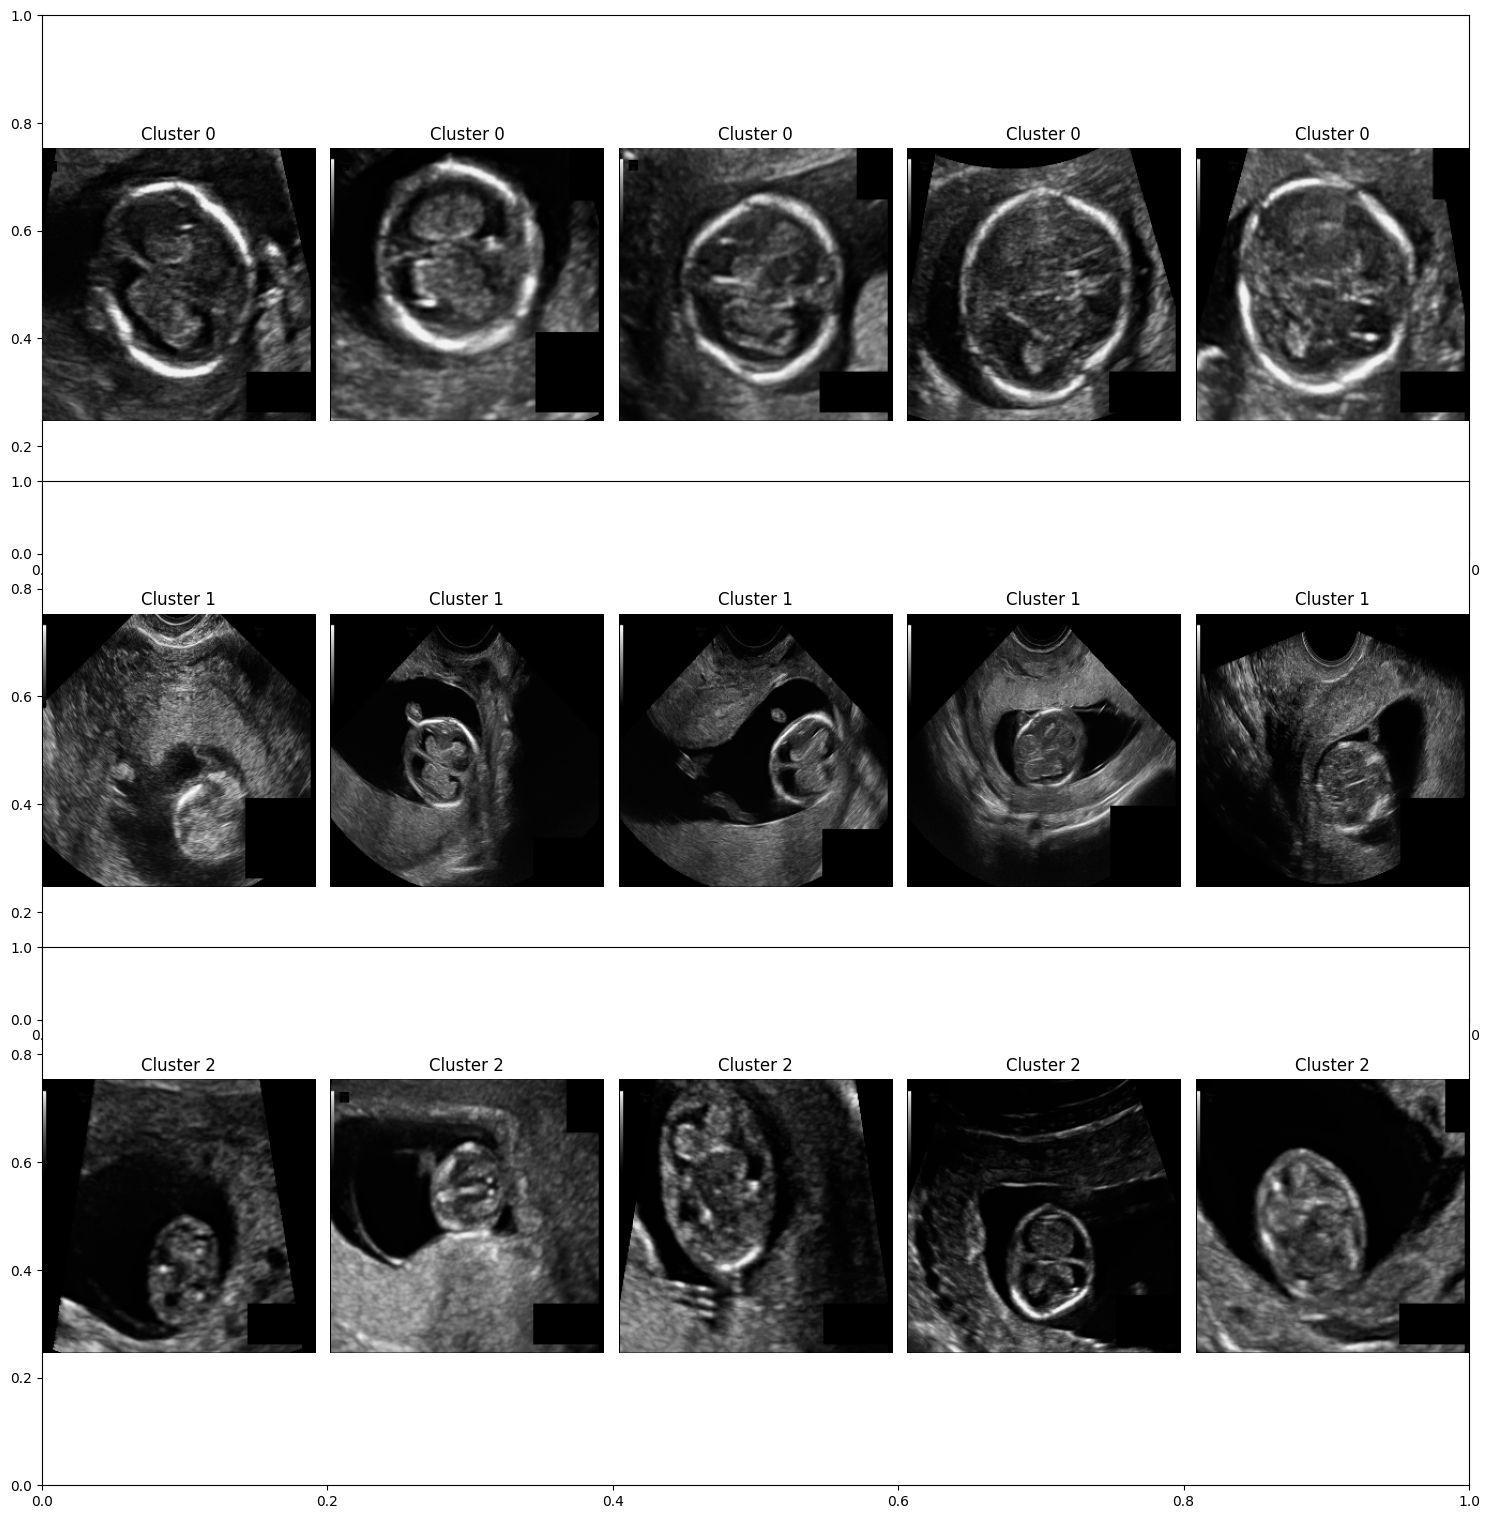

In [18]:
def plot_clustered_images(df, images_array, n_clusters):
    plt.figure(figsize=(15, 15))
    for cluster in range(n_clusters):
        plt.subplot(n_clusters, 1, cluster + 1) 
        cluster_images = df[df['cluster_label'] == cluster]  
        
        for i in range(min(len(cluster_images), 5)):  
            img_index = cluster_images.index[i] 
            plt.subplot(n_clusters, 5, cluster * 5 + i + 1)  
            plt.imshow(images_array[img_index]) 
            plt.axis('off')
            plt.title(f'Cluster {cluster}') 
        
    plt.tight_layout()
    plt.show()

plot_clustered_images(df, images_array, n_clusters)

In [19]:
df

,image_path,cluster_label
0,000_HC.png,2
1,001_HC.png,2
2,002_HC.png,2
3,003_HC.png,2
4,004_HC.png,2
...,...,...
994,801_HC.png,1
995,802_HC.png,2
996,803_HC.png,1
997,804_HC.png,1


In [20]:
df['cluster_label'] = df['cluster_label'].astype(str)

In [21]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(df[['image_path']], df['cluster_label'])

In [22]:
df_resampled = pd.DataFrame(X_resampled, columns=['image_path'])
df_resampled['cluster_label'] = y_resampled

In [23]:
print("\nClass distribution after oversampling =>")
print(df_resampled['cluster_label'].value_counts())


Class distribution after oversampling =>
cluster_label
2    431
1    431
0    431
Name: count, dtype: int64


In [24]:
df_resampled

,image_path,cluster_label
0,000_HC.png,2
1,001_HC.png,2
2,002_HC.png,2
3,003_HC.png,2
4,004_HC.png,2
...,...,...
1288,122_HC.png,2
1289,075_HC.png,2
1290,093_HC.png,2
1291,050_2HC.png,2


In [25]:
sns.set_style('darkgrid')

warnings.filterwarnings("ignore")

print ('Check..............')

Check..............


In [26]:
df_resampled['cluster_label'] = df_resampled['cluster_label'].astype(str)

In [27]:
train_df_new, temp_df_new = train_test_split(
    df_resampled,
    train_size=0.8,
    shuffle=True,
    random_state=42,
    stratify=df_resampled['cluster_label']
)

valid_df_new, test_df_new = train_test_split(
    temp_df_new,
    test_size=0.5,
    shuffle=True,
    random_state=42,
    stratify=temp_df_new['cluster_label']
)

In [28]:
batch_size = 16
img_size = (224, 224)
channels = 3

tr_gen = ImageDataGenerator(rescale=1./255)
ts_gen = ImageDataGenerator(rescale=1./255)

directory = 'Diverse Fetal Head Images-orginal-image/'

train_gen_new = tr_gen.flow_from_dataframe(
    train_df_new,
    directory=directory,  
    x_col='image_path',
    y_col='cluster_label',
    target_size=img_size,
    class_mode='sparse',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size
)

valid_gen_new = ts_gen.flow_from_dataframe(
    valid_df_new,
    directory=directory,
    x_col='image_path',
    y_col='cluster_label',
    target_size=img_size,
    class_mode='sparse',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size
)

test_gen_new = ts_gen.flow_from_dataframe(
    test_df_new,
    directory=directory,
    x_col='image_path',
    y_col='cluster_label',
    target_size=img_size,
    class_mode='sparse',
    color_mode='rgb',
    shuffle=False,
    batch_size=batch_size
)

Found 1034 validated image filenames belonging to 3 classes.
Found 129 validated image filenames belonging to 3 classes.
Found 130 validated image filenames belonging to 3 classes.


In [29]:
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    print("Using GPU")
else:
    print("Using CPU")

Using CPU


In [30]:
def create_cnn_model(input_shape):
    model = models.Sequential()
    
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())
    
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(3, activation='softmax')) 

    return model

In [31]:
input_shape = (224, 224, 3)   

cnn_model = create_cnn_model(input_shape)

In [32]:
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',  
                  metrics=['accuracy'])

In [33]:
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,347 (42.61 MB)

 Trainable params: 11,169,347 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [35]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=10,  
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 23s 318ms/step - accuracy: 0.5048 - loss: 1.1985 - val_accuracy: 0.8527 - val_loss: 0.4637
Epoch 2/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 20s 311ms/step - accuracy: 0.8671 - loss: 0.3336 - val_accuracy: 0.9147 - val_loss: 0.3221
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 20s 306ms/step - accuracy: 0.9442 - loss: 0.1472 - val_accuracy: 0.9147 - val_loss: 0.3060
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 20s 309ms/step - accuracy: 0.9858 - loss: 0.0542 - val_accuracy: 0.9070 - val_loss: 0.2886
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 21s 319ms/step - accuracy: 0.9803 - loss: 0.0518 - val_accuracy: 0.8760 - val_loss: 0.7137
Epoch 6/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 20s 311ms/step - accuracy: 0.9916 - loss: 0.0258 - val_accuracy: 0.9070 - val_loss: 0.5460
Epoch 7/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 20s 310ms/step - accuracy: 0.9990 - loss: 0.0098 - val_accuracy: 0.8760 - val_loss: 0.5542
Epoch 8/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 20s 312ms/step - accuracy: 0.9901 - loss: 0.0220 - val_accu

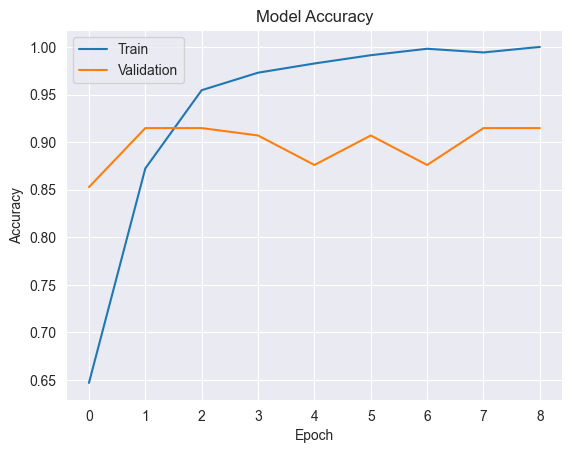

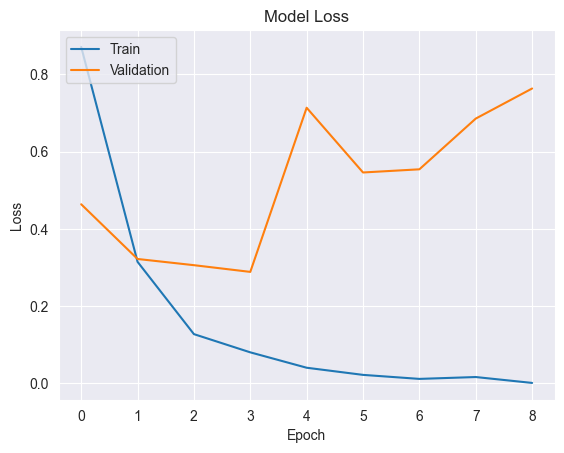

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [37]:
test_labels = test_gen_new.classes  
predictions = cnn_model.predict(test_gen_new)  
predicted_classes = np.argmax(predictions, axis=1)

9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 149ms/step


In [38]:
report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

           0       0.82      0.98      0.89        43
           1       0.88      0.86      0.87        43
           2       1.00      0.84      0.91        44

    accuracy                           0.89       130
   macro avg       0.90      0.89      0.89       130
weighted avg       0.90      0.89      0.89       130



In [39]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)

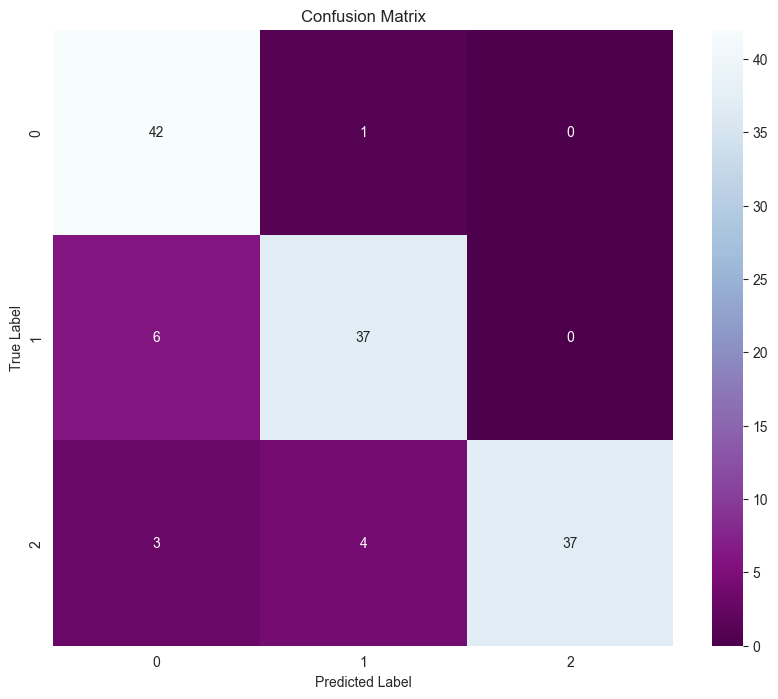

In [40]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='BuPu_r', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [41]:
def create_inception_model(input_shape):
   
    base_model = InceptionV3(weights='imagenet', input_shape=input_shape, include_top=False)
    
   
    for layer in base_model.layers:
        layer.trainable = False

    model = Sequential()
    model.add(base_model)
    
    model.add(GaussianNoise(0.25))  
    
    model.add(GlobalAveragePooling2D())  
    
    model.add(Dense(512, activation='relu'))  
    model.add(BatchNormalization())  
    model.add(GaussianNoise(0.25))  
    model.add(Dropout(0.25))  
    
    model.add(Dense(3, activation='softmax'))  

    return model

In [42]:
input_shape = (224, 224, 3)  
cnn_model = create_inception_model(input_shape)

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',  
                  metrics=['accuracy'])

In [43]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=10,  
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 37s 426ms/step - accuracy: 0.6322 - loss: 0.9551 - val_accuracy: 0.7674 - val_loss: 0.5995
Epoch 2/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 24s 366ms/step - accuracy: 0.8665 - loss: 0.3813 - val_accuracy: 0.7752 - val_loss: 0.5052
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 24s 367ms/step - accuracy: 0.9077 - loss: 0.2193 - val_accuracy: 0.8837 - val_loss: 0.3334
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 24s 369ms/step - accuracy: 0.9383 - loss: 0.1770 - val_accuracy: 0.8527 - val_loss: 0.3607
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 24s 371ms/step - accuracy: 0.9433 - loss: 0.1658 - val_accuracy: 0.8915 - val_loss: 0.3445


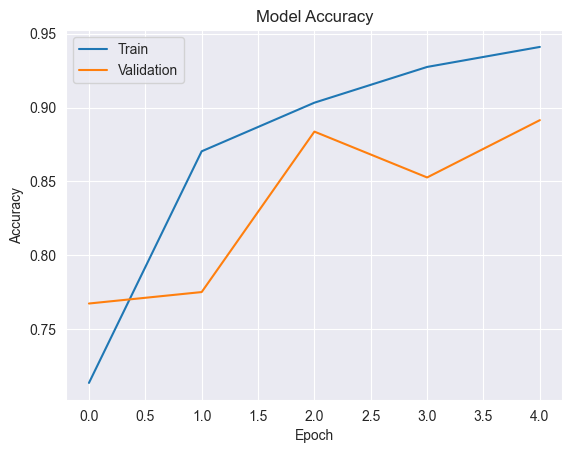

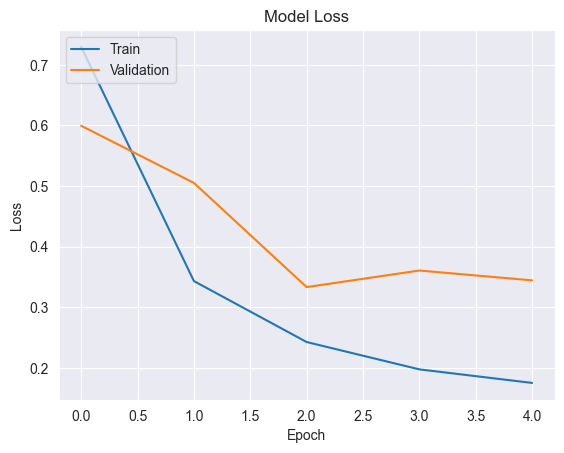

In [44]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [45]:
test_labels = test_gen_new.classes  
predictions = cnn_model.predict(test_gen_new)  
predicted_classes = np.argmax(predictions, axis=1)

9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 716ms/step


In [46]:
report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

           0       0.87      0.77      0.81        43
           1       0.68      1.00      0.81        43
           2       1.00      0.66      0.79        44

    accuracy                           0.81       130
   macro avg       0.85      0.81      0.81       130
weighted avg       0.85      0.81      0.81       130



In [47]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)

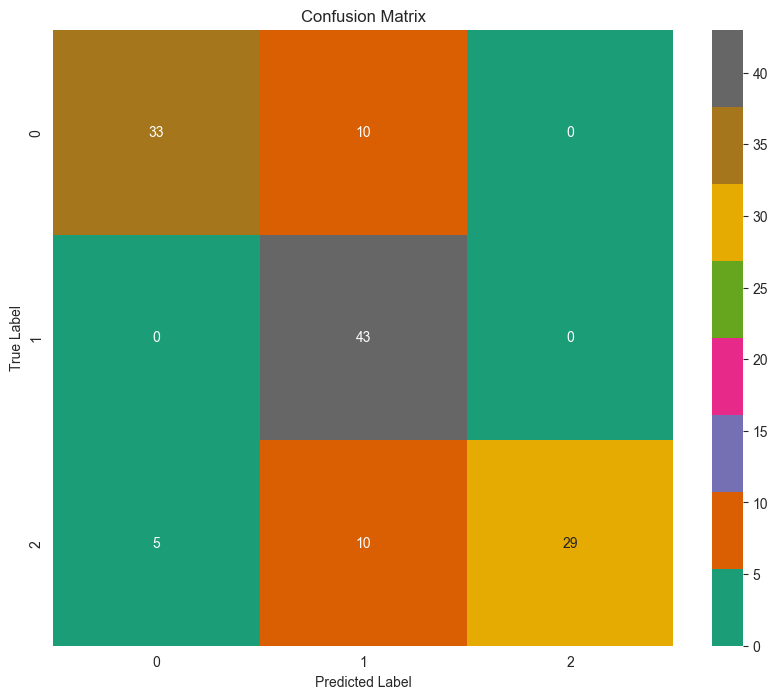

In [48]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Dark2', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [49]:
def create_xception_model(input_shape):
    
    base_model = Xception(weights='imagenet', input_shape=input_shape, include_top=False)
    
    for layer in base_model.layers:
        layer.trainable = False

    model = Sequential()
    model.add(base_model)
    model.add(GaussianNoise(0.25))  
    model.add(GlobalAveragePooling2D())  
    model.add(Dense(512, activation='relu'))  
    model.add(BatchNormalization()) 
    model.add(GaussianNoise(0.25))  
    model.add(Dropout(0.25))  
    model.add(Dense(3, activation='softmax'))  

    return model

input_shape = (224, 224, 3)
cnn_model = create_xception_model(input_shape)

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [50]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=10,  
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 51s 704ms/step - accuracy: 0.6722 - loss: 0.7812 - val_accuracy: 0.7597 - val_loss: 0.6419
Epoch 2/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 44s 670ms/step - accuracy: 0.8875 - loss: 0.2830 - val_accuracy: 0.8217 - val_loss: 0.4909
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 44s 669ms/step - accuracy: 0.9205 - loss: 0.2250 - val_accuracy: 0.8217 - val_loss: 0.4252
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 44s 668ms/step - accuracy: 0.9261 - loss: 0.1957 - val_accuracy: 0.8217 - val_loss: 0.4090
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 44s 670ms/step - accuracy: 0.9288 - loss: 0.1644 - val_accuracy: 0.8450 - val_loss: 0.3540


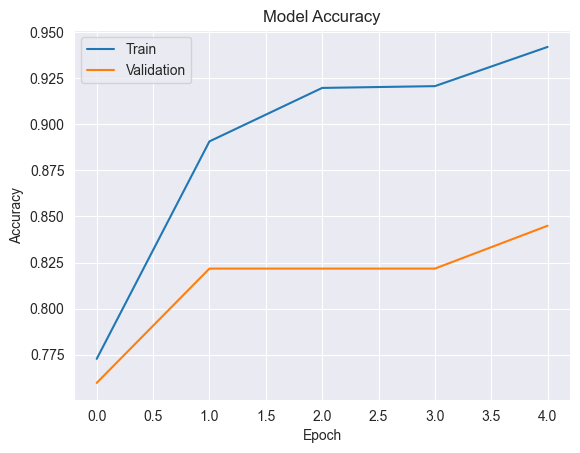

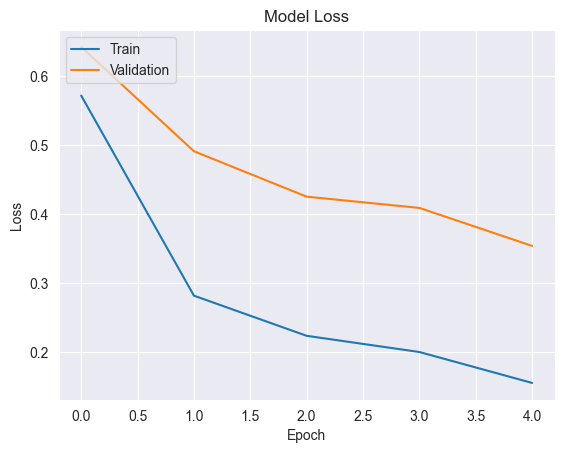

In [51]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [52]:
test_labels = test_gen_new.classes  
predictions = cnn_model.predict(test_gen_new)  
predicted_classes = np.argmax(predictions, axis=1)

9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 725ms/step


In [53]:
report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

           0       0.80      0.81      0.80        43
           1       0.73      0.93      0.82        43
           2       1.00      0.70      0.83        44

    accuracy                           0.82       130
   macro avg       0.84      0.82      0.82       130
weighted avg       0.84      0.82      0.82       130



In [54]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)

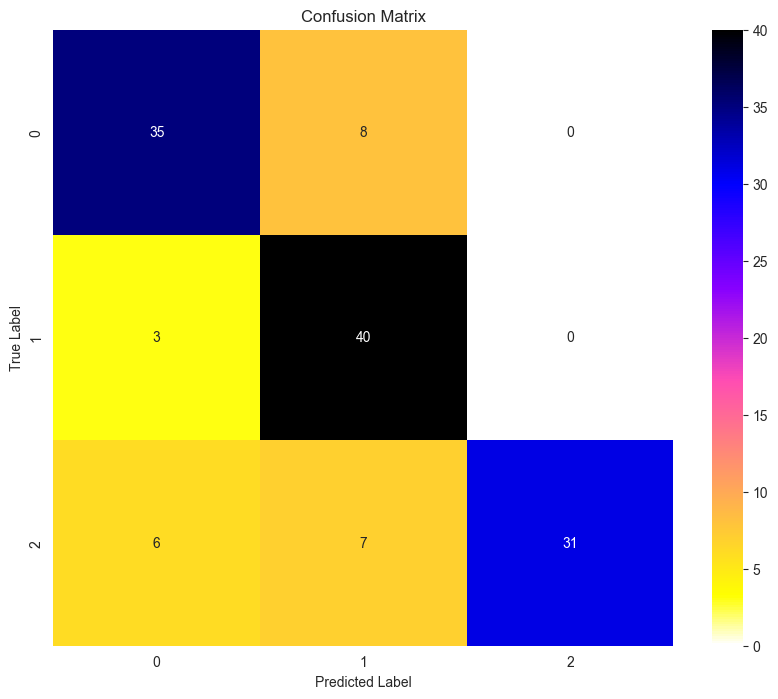

In [56]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='gnuplot2_r', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [57]:
def create_xception_model(input_shape):
    
    inputs = Input(shape=input_shape)
    
    base_model = Xception(weights='imagenet', input_tensor=inputs, include_top=False)
    
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output

    height, width, channels = 7, 7, 2048  
    x = Reshape((height * width, channels))(x)  
   
    attention_output = MultiHeadAttention(num_heads=8, key_dim=channels)(x, x) 

    attention_output = Reshape((height, width, channels))(attention_output)
    
    x = GaussianNoise(0.25)(attention_output)
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = GaussianNoise(0.25)(x)
    x = Dropout(0.25)(x)
    outputs = Dense(3, activation='softmax')(x)  

    model = Model(inputs=inputs, outputs=outputs)

    return model

input_shape = (224, 224, 3)
cnn_model = create_xception_model(input_shape)

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [58]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=10,  
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 366s 5s/step - accuracy: 0.7599 - loss: 0.6423 - val_accuracy: 0.6667 - val_loss: 0.7375
Epoch 2/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 263s 4s/step - accuracy: 0.8699 - loss: 0.3414 - val_accuracy: 0.5349 - val_loss: 2.6042
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 325s 5s/step - accuracy: 0.9420 - loss: 0.1581 - val_accuracy: 0.7519 - val_loss: 0.7181
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 277s 4s/step - accuracy: 0.9362 - loss: 0.1678 - val_accuracy: 0.6667 - val_loss: 1.1497
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 1610s 25s/step - accuracy: 0.9333 - loss: 0.1673 - val_accuracy: 0.8062 - val_loss: 0.5567


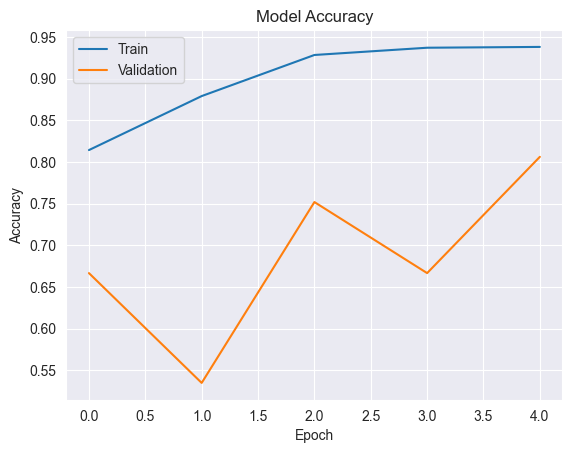

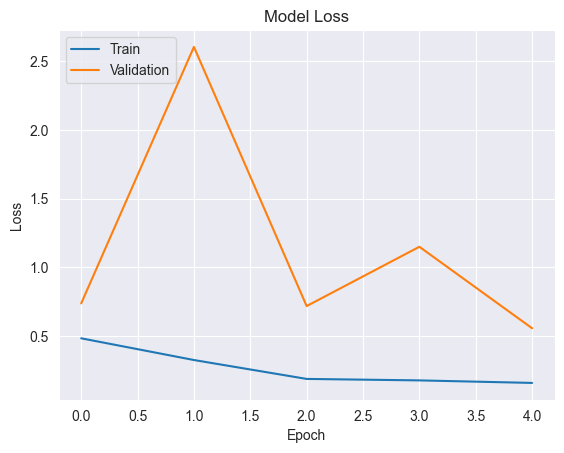

In [59]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [60]:
test_labels = test_gen_new.classes  
predictions = cnn_model.predict(test_gen_new)  
predicted_classes = np.argmax(predictions, axis=1)

9/9 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step


In [61]:
report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

           0       0.60      0.98      0.74        43
           1       1.00      0.56      0.72        43
           2       0.97      0.80      0.88        44

    accuracy                           0.78       130
   macro avg       0.86      0.78      0.78       130
weighted avg       0.86      0.78      0.78       130



In [62]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)

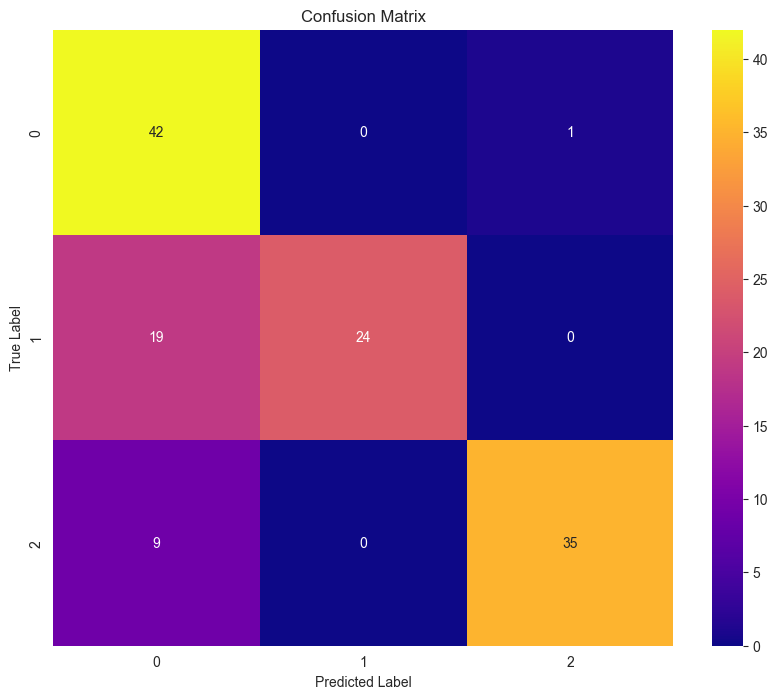

In [63]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='plasma', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [64]:
def create_inception_model(input_shape):
    
    inputs = Input(shape=input_shape)

    base_model = InceptionV3(weights='imagenet', input_tensor=inputs, include_top=False)
    
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output

    height, width, channels = 5, 5, 2048  
    x = Reshape((height * width, channels))(x) 

    attention_output = MultiHeadAttention(num_heads=8, key_dim=channels)(x, x)  

    attention_output = Reshape((height, width, channels))(attention_output)
    
    x = GaussianNoise(0.25)(attention_output)
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = GaussianNoise(0.25)(x)
    x = Dropout(0.25)(x)
    outputs = Dense(3, activation='softmax')(x)  

    model = Model(inputs=inputs, outputs=outputs)

    return model

input_shape = (224, 224, 3)
cnn_model = create_inception_model(input_shape)

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [65]:
history = cnn_model.fit(
    train_gen_new,
    validation_data=valid_gen_new,
    epochs=10,  
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 244s 3s/step - accuracy: 0.7496 - loss: 0.6810 - val_accuracy: 0.7597 - val_loss: 0.6554
Epoch 2/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 340s 5s/step - accuracy: 0.9021 - loss: 0.2809 - val_accuracy: 0.8527 - val_loss: 0.5659
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 201s 3s/step - accuracy: 0.9397 - loss: 0.1594 - val_accuracy: 0.9070 - val_loss: 0.2546
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 206s 3s/step - accuracy: 0.9626 - loss: 0.1164 - val_accuracy: 0.8140 - val_loss: 0.9822
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 169s 3s/step - accuracy: 0.9603 - loss: 0.1183 - val_accuracy: 0.8837 - val_loss: 0.5475
Epoch 6/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 171s 3s/step - accuracy: 0.9776 - loss: 0.0655 - val_accuracy: 0.9070 - val_loss: 0.3943
Epoch 7/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 218s 3s/step - accuracy: 0.9811 - loss: 0.0604 - val_accuracy: 0.9225 - val_loss: 0.4855
Epoch 8/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 204s 3s/step - accuracy: 0.9906 - loss: 0.0284 - val_accuracy: 0.8992 - v

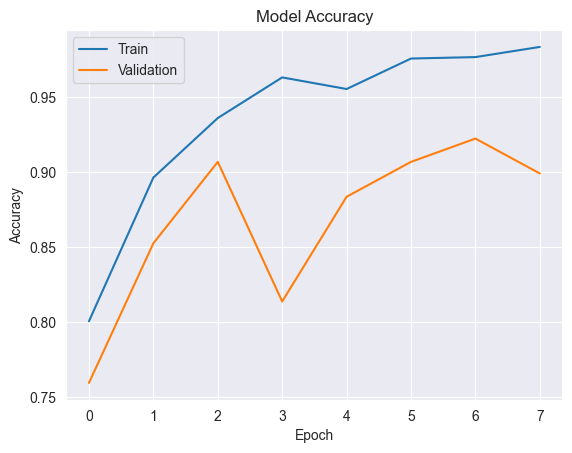

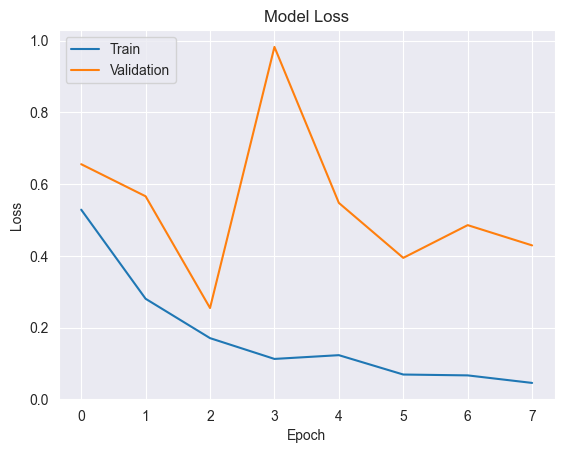

In [66]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [67]:
test_labels = test_gen_new.classes  
predictions = cnn_model.predict(test_gen_new)  
predicted_classes = np.argmax(predictions, axis=1)

9/9 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step 


In [68]:
report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        43
           1       0.93      0.95      0.94        43
           2       0.95      0.86      0.90        44

    accuracy                           0.92       130
   macro avg       0.92      0.92      0.92       130
weighted avg       0.92      0.92      0.92       130



In [69]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)

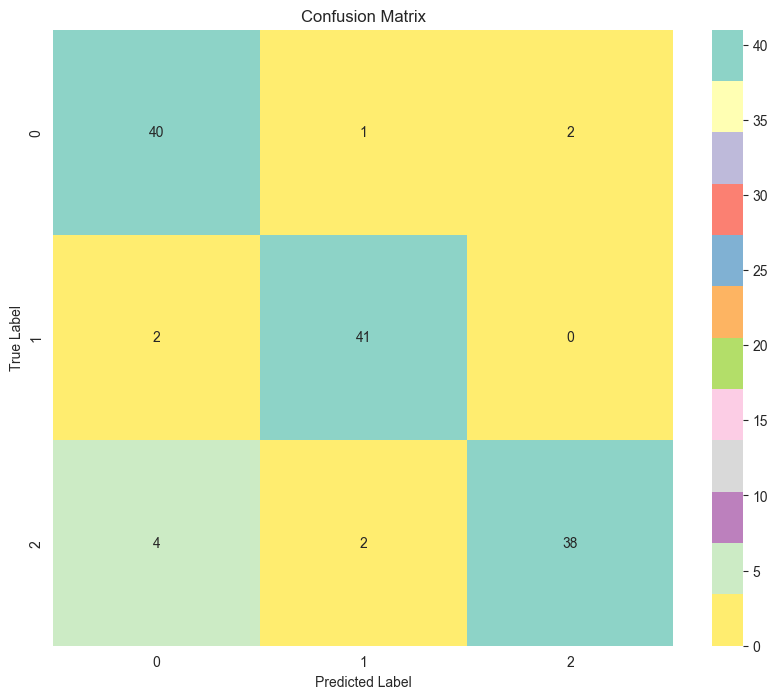

In [70]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Set3_r', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()